In [1]:
import numpy as np
import pandas as pd
import pickle
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
def splitData():
    df_train_neg = df_train.loc[df_train['isFraud'] == 0]
    df_train_pos = df_train.loc[df_train['isFraud'] == 1]
    
    split = 0.2
    x_train_pos, x_val_pos = train_test_split(df_train_pos, test_size=split, random_state=42)
    x_train_neg, x_val_neg = train_test_split(df_train_neg, test_size=split, random_state=42)
    
    #downsample the majority to achieve 1:1 class distribution
    x_train_neg = x_train_neg.sample(frac=1/27)
    x_val_neg   = x_val_neg.sample(frac=1/27)
    
    #combine and reshuffle training and validation sets
    x_train = (x_train_pos.append(x_train_neg)).sample(frac=1)
    x_val   = (x_val_pos.append(x_val_neg)).sample(frac=1)
    
    y_train = x_train.pop('isFraud')
    y_val   = x_val.pop('isFraud')
    
    return x_train, x_val, y_train, y_val

READ: 0.5172357559204102 seconds
PREPRO: 0.6239991188049316 seconds
Starting : Logistic_Regression


C:\Users\myneni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


FIT: 14.5548837184906 seconds
SCORE: 0.029003620147705078 seconds
LOGISTIC_REGRESSION
Logistic_Regression scored: 0.7093607852525736
PREDICTION: 0.009001493453979492 seconds
[[3110 1111]
 [1317 2816]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      4221
           1       0.72      0.68      0.70      4133

   micro avg       0.71      0.71      0.71      8354
   macro avg       0.71      0.71      0.71      8354
weighted avg       0.71      0.71      0.71      8354

PROBABILITY PREDICTION: 0.02100062370300293 seconds


C:\Users\myneni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


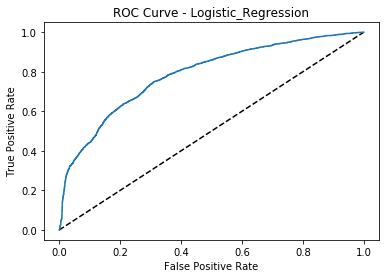

AUC: 0.7867324628341706
TOTAL for Logistic_Regression : 16.933624505996704 seconds
Starting : Nearest_Neighbors
FIT: 2.0409979820251465 seconds
SCORE: 11.581504583358765 seconds
NEAREST_NEIGHBORS
Nearest_Neighbors scored: 0.7554464926981087
PREDICTION: 11.205150127410889 seconds
[[3181 1040]
 [1003 3130]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      4221
           1       0.75      0.76      0.75      4133

   micro avg       0.76      0.76      0.76      8354
   macro avg       0.76      0.76      0.76      8354
weighted avg       0.76      0.76      0.76      8354

PROBABILITY PREDICTION: 11.071134805679321 seconds


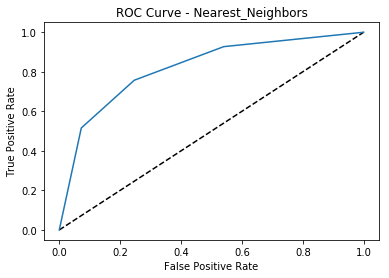

AUC: 0.8199509177007362
TOTAL for Nearest_Neighbors : 778.3535768985748 seconds
Starting : Neural_Net
FIT: 8.264474391937256 seconds
SCORE: 0.020000934600830078 seconds
NEURAL_NET
Neural_Net scored: 0.706128800574575
PREDICTION: 0.018999099731445312 seconds
[[3188 1033]
 [1422 2711]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      4221
           1       0.72      0.66      0.69      4133

   micro avg       0.71      0.71      0.71      8354
   macro avg       0.71      0.71      0.71      8354
weighted avg       0.71      0.71      0.71      8354

PROBABILITY PREDICTION: 0.02899956703186035 seconds


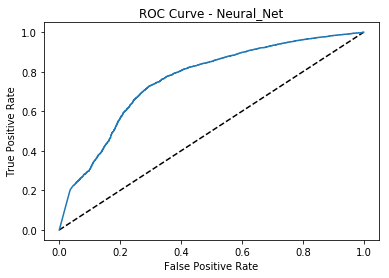

AUC: 0.7593803705081336
TOTAL for Neural_Net : 11.2221839427948 seconds
Starting : Decision_Tree
FIT: 0.3470020294189453 seconds
SCORE: 0.013941287994384766 seconds
DECISION_TREE
Decision_Tree scored: 0.7700502753172133
PREDICTION: 0.013048648834228516 seconds
[[3352  869]
 [1052 3081]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      4221
           1       0.78      0.75      0.76      4133

   micro avg       0.77      0.77      0.77      8354
   macro avg       0.77      0.77      0.77      8354
weighted avg       0.77      0.77      0.77      8354

PROBABILITY PREDICTION: 0.026000261306762695 seconds


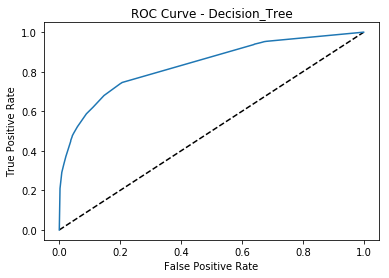

AUC: 0.8345549739120237
TOTAL for Decision_Tree : 3.055392026901245 seconds
Starting : Random_Forest
FIT: 0.08510208129882812 seconds
SCORE: 0.015981197357177734 seconds
RANDOM_FOREST
Random_Forest scored: 0.7354560689490065
PREDICTION: 0.01500082015991211 seconds
[[3349  872]
 [1338 2795]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      4221
           1       0.76      0.68      0.72      4133

   micro avg       0.74      0.74      0.74      8354
   macro avg       0.74      0.73      0.73      8354
weighted avg       0.74      0.74      0.73      8354

PROBABILITY PREDICTION: 0.026998519897460938 seconds


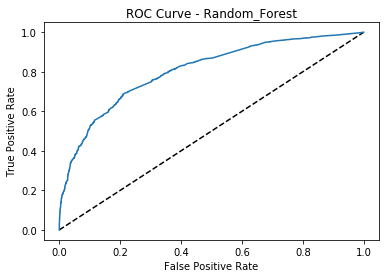

AUC: 0.805509540541735
TOTAL for Random_Forest : 3.1645822525024414 seconds
Starting : AdaBoost
FIT: 4.907510042190552 seconds
SCORE: 0.11100101470947266 seconds
ADABOOST
AdaBoost scored: 0.7856116830260953
PREDICTION: 0.07800006866455078 seconds
[[3509  712]
 [1079 3054]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      4221
           1       0.81      0.74      0.77      4133

   micro avg       0.79      0.79      0.79      8354
   macro avg       0.79      0.79      0.78      8354
weighted avg       0.79      0.79      0.79      8354

PROBABILITY PREDICTION: 0.09399962425231934 seconds


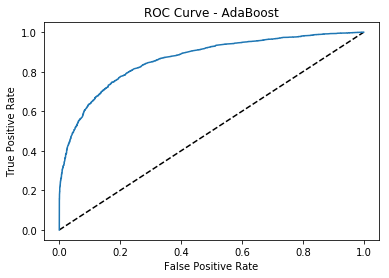

AUC: 0.8642266184545112
TOTAL for AdaBoost : 14.11938190460205 seconds
Starting : Naive_Bayes
FIT: 0.23596668243408203 seconds
SCORE: 0.06099963188171387 seconds
NAIVE_BAYES
Naive_Bayes scored: 0.5539861144361983
PREDICTION: 0.06399750709533691 seconds
[[3626  595]
 [3131 1002]]
              precision    recall  f1-score   support

           0       0.54      0.86      0.66      4221
           1       0.63      0.24      0.35      4133

   micro avg       0.55      0.55      0.55      8354
   macro avg       0.58      0.55      0.51      8354
weighted avg       0.58      0.55      0.51      8354

PROBABILITY PREDICTION: 0.0760040283203125 seconds


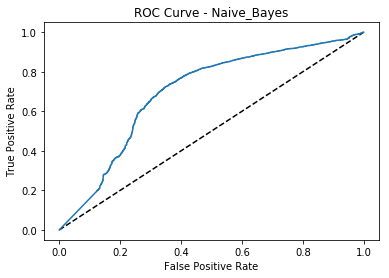

AUC: 0.6968315933037451
TOTAL for Naive_Bayes : 4.929209232330322 seconds
Starting : QDA


C:\Users\myneni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


FIT: 0.39914751052856445 seconds
SCORE: 0.06600165367126465 seconds
QDA
QDA scored: 0.6826669858750299
PREDICTION: 0.07200169563293457 seconds
[[3859  362]
 [2289 1844]]
              precision    recall  f1-score   support

           0       0.63      0.91      0.74      4221
           1       0.84      0.45      0.58      4133

   micro avg       0.68      0.68      0.68      8354
   macro avg       0.73      0.68      0.66      8354
weighted avg       0.73      0.68      0.66      8354

PROBABILITY PREDICTION: 0.07599997520446777 seconds


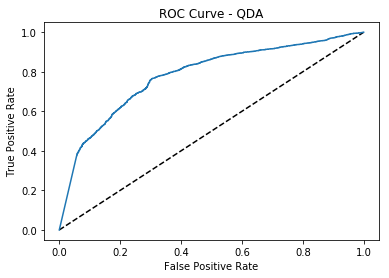

AUC: 0.78046645323496
TOTAL for QDA : 6.1882688999176025 seconds
Starting : Gaussian_Process


In [ ]:
names = [ "Logistic_Regression", "Nearest_Neighbors", "Neural_Net",
         "Decision_Tree", "Random_Forest", "AdaBoost",
         "Naive_Bayes", "QDA", "Gaussian_Process","Linear_SVM", "RBF_SVM"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),    
    MLPClassifier(alpha=1, max_iter=1000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)
]

#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                           random_state=1, n_clusters_per_class=1)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
#linearly_separable = (X, y)
start = time.time()
# array of tuples: train and test in each tuple.
with open('df_test_cleaned.pickle','rb') as f:
    df_test = pickle.load(f)
with open('df_train_cleaned.pickle','rb') as g:
    df_train = pickle.load(g)
with open('df_test_transactionids.pickle','rb') as h:
    df_test_transactionids = pickle.load(h)

read = time.time()
print('READ: ' + str(read - start) + ' seconds')
datasets = [(df_train,df_test)]

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
#    X, y = ds
#    X = StandardScaler().fit_transform(X)
#    X_train, X_test, y_train, y_test = \
#        train_test_split(X, y, test_size=.4, random_state=42)

    start2 = time.time()
    X_train, X_test, y_train, y_test = splitData()
    prepro = time.time()
    print('PREPRO: ' + str(prepro - start2) + ' seconds')
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        startloop = time.time()
        print("Starting : " + name)
        clf.fit(X_train, y_train)
        fittime = time.time()
        print('FIT: ' + str(fittime - startloop) + ' seconds')
        score = clf.score(X_test, y_test)
        scoretime = time.time()
        print('SCORE: ' + str(scoretime - fittime) + ' seconds')
        print(name.upper())
        print("===========================")
        print(name + " scored: " + str(score))

        # P R E D I C T
        # Predict the labels of the test set: y_pred
        y_pred = clf.predict(X_test)
        predtime = time.time()
        print('PREDICTION: ' + str(predtime - scoretime) + ' seconds')
        #
        # E V A L U A T E
        #
        # Compute and print the confusion matrix and classification report
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # R O C 
        # Compute predicted probabilities: y_pred_prob
        y_pred_prob = clf.predict_proba(X_test)[:,1]
        prdprobtime = time.time()
        print('PROBABILITY PREDICTION: ' + str(prdprobtime - predtime) + ' seconds')

        # Generate ROC curve values: fpr, tpr, thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

        # Plot ROC curve
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - ' + name)
        plt.show()        
        
        # AUC Calculations
        # A U C
        # Compute predicted probabilities: y_pred_prob
        #y_pred_prob = clf.predict_proba(X_test)[:,1]

        # Compute and print AUC score
        print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

        # Compute cross-validated AUC scores: cv_auc
        #X = df_train.drop('isFraud',axis=1)
        #y = df_train['isFraud']
        #cv_auc = cross_val_score(clf,X,y,scoring='roc_auc',cv=5)
        # Print list of AUC scores
        #print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
        
        y_real_pred = clf.predict_proba(df_test)[:,1]
        realpredtime=time.time()
        print('FINAL PREDICTION: ' + str(realpredtime - prdprobtime) + ' seconds')
        results_dict = dict(zip(df_test_transactionids.to_list(),y_real_pred))
        items = results_dict.items()
        results_df = pd.DataFrame({'TransactionID': [i[0] for i in items], 'isFraud': [i[1] for i in items]})
        csv_name = 'results_'+name+'.csv'
        results_df.to_csv(csv_name,index=False)
        fintim = time.time()
        print('TOTAL for ' + name + ' : ' + str(fintim - startloop) + ' seconds')
        print("===========================")
        print("===========================")